<a href="https://colab.research.google.com/github/merissaann/ict-assignments/blob/main/classification_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
data = pd.read_csv('/content/pima-indians-diabetes.data.csv')
print(data)

      6  148  72  35    0  33.6  0.627  50  1
0     1   85  66  29    0  26.6  0.351  31  0
1     8  183  64   0    0  23.3  0.672  32  1
2     1   89  66  23   94  28.1  0.167  21  0
3     0  137  40  35  168  43.1  2.288  33  1
4     5  116  74   0    0  25.6  0.201  30  0
..   ..  ...  ..  ..  ...   ...    ...  .. ..
762  10  101  76  48  180  32.9  0.171  63  0
763   2  122  70  27    0  36.8  0.340  27  0
764   5  121  72  23  112  26.2  0.245  30  0
765   1  126  60   0    0  30.1  0.349  47  1
766   1   93  70  31    0  30.4  0.315  23  0

[767 rows x 9 columns]


In [10]:
data.isna().sum()

,0
6,0
148,0
72,0
35,0
0,0
33.6,0
0.627,0
50,0
1,0


In [11]:
data.columns

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')

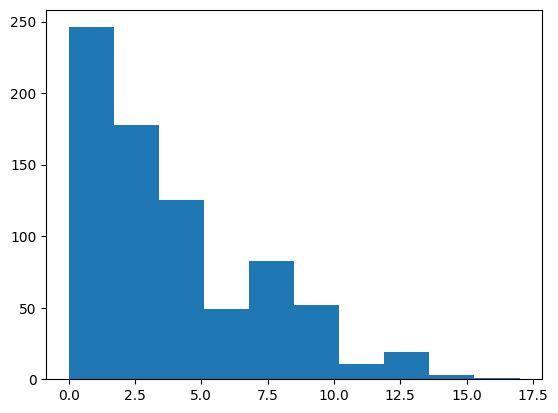

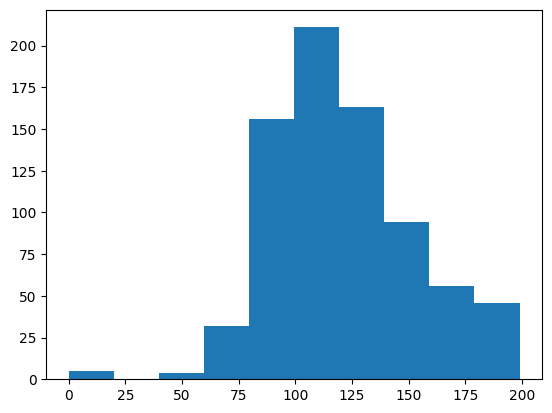

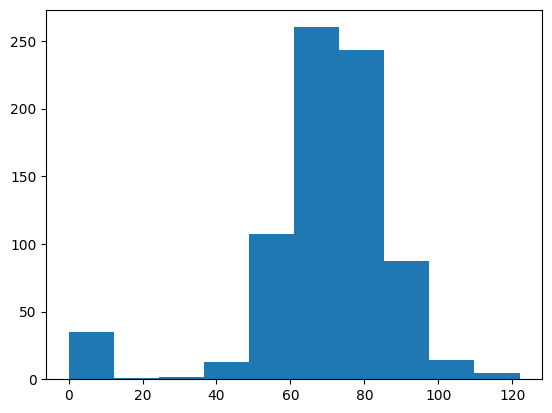

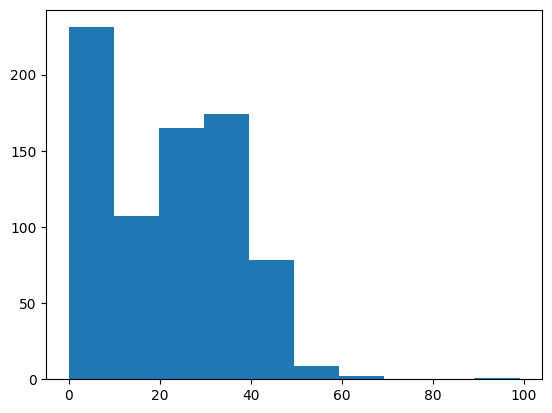

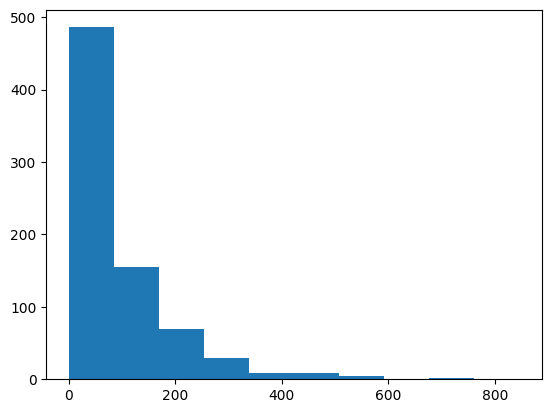

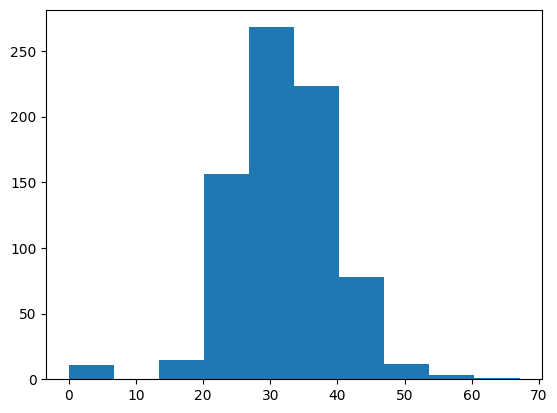

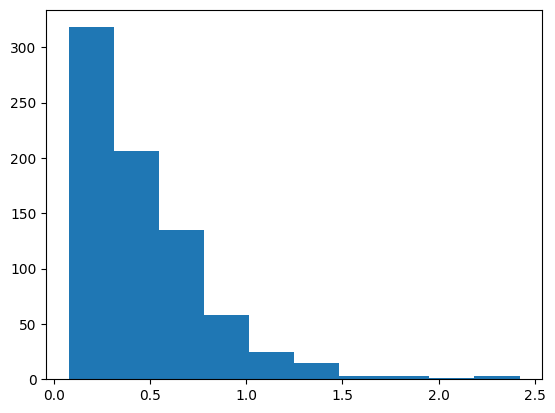

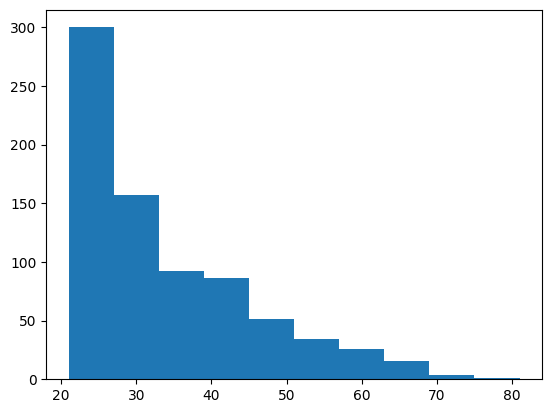

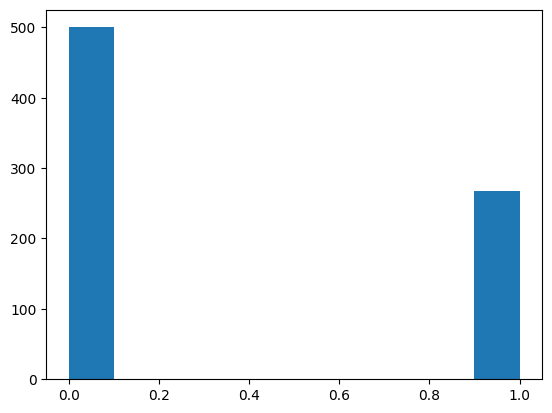

In [4]:
import matplotlib.pyplot as plt
for col in data.columns:
  plt.hist(data[col])
  plt.show()

In [12]:
new_data=['6', '148', '72', '35', '0', '33.6', '0.627', '50']

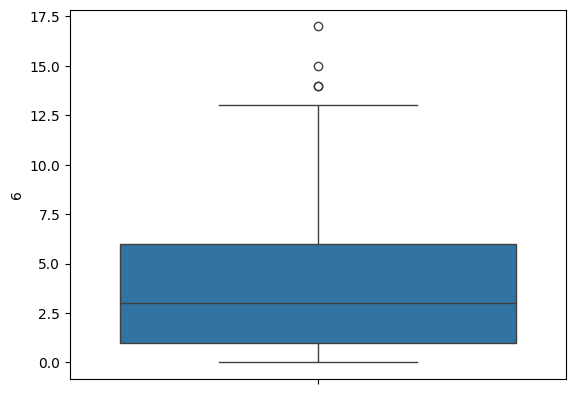

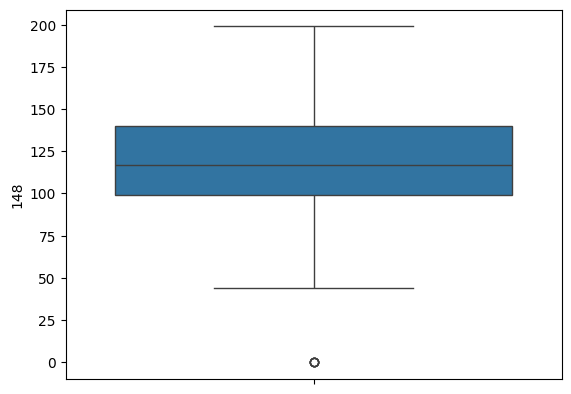

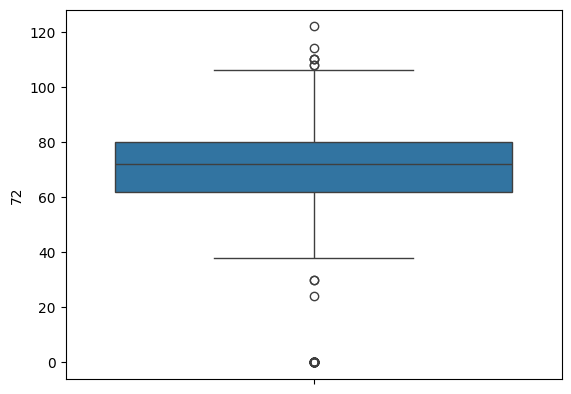

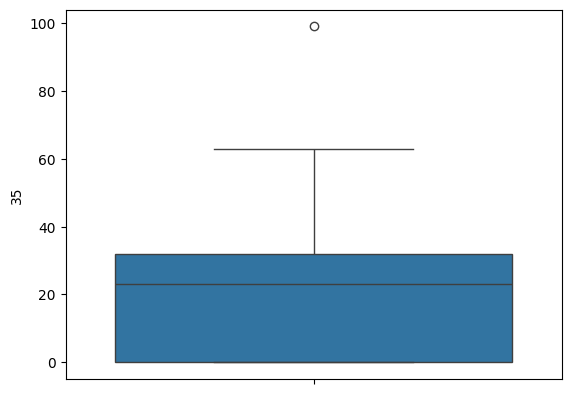

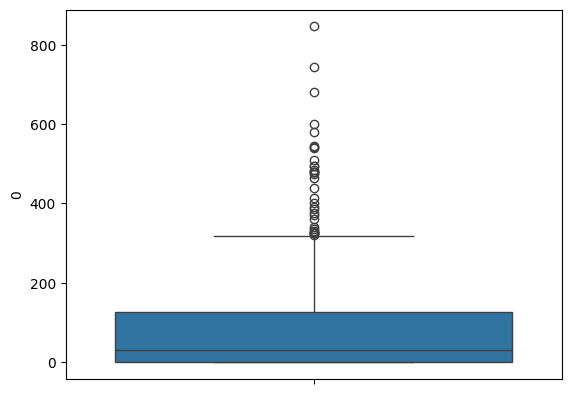

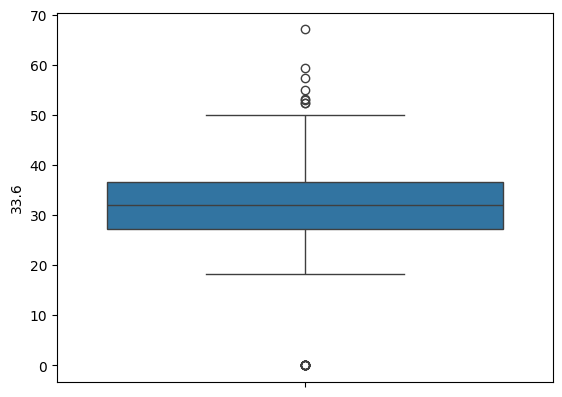

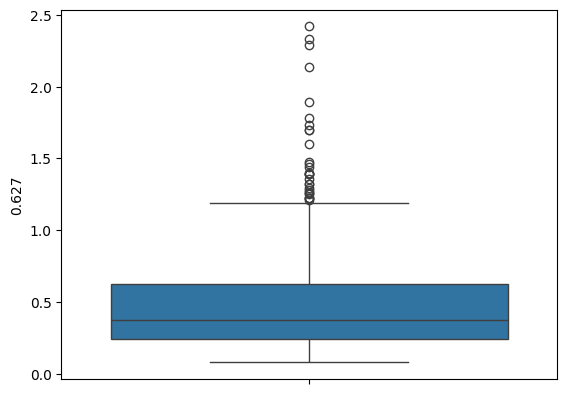

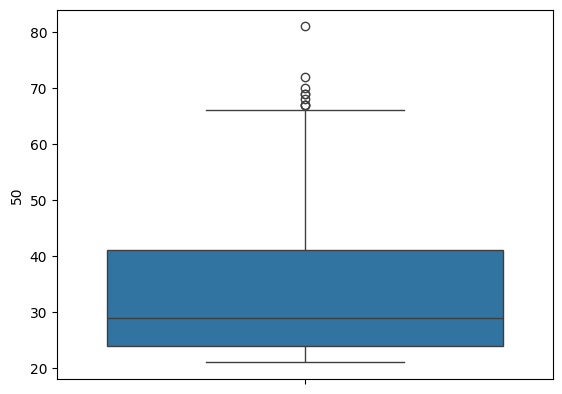

In [13]:
import seaborn as sns
from seaborn import boxplot
for col in new_data:
    sns.boxplot(data[col])
    plt.show()

In [14]:
outlierbox=['6', '148', '72','0', '33.6', '0.627', '50']

1.0
3.0
6.0
5.0
-6.5
13.5


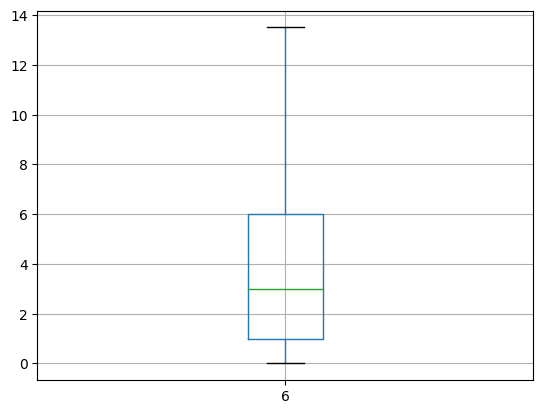

99.0
117.0
140.0
41.0
37.5
201.5


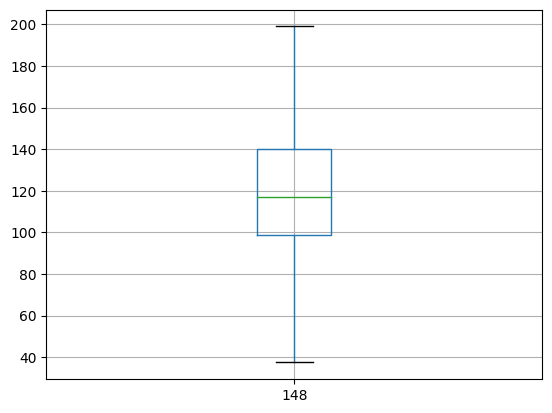

62.0
72.0
80.0
18.0
35.0
107.0


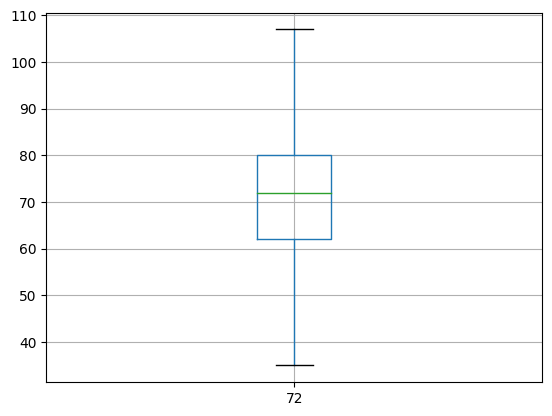

0.0
32.0
127.5
127.5
-191.25
318.75


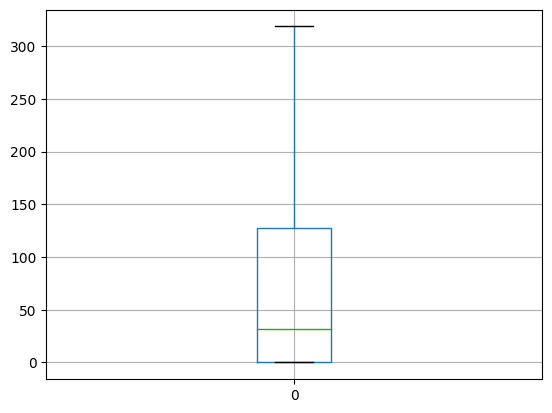

27.3
32.0
36.6
9.3
13.35
50.550000000000004


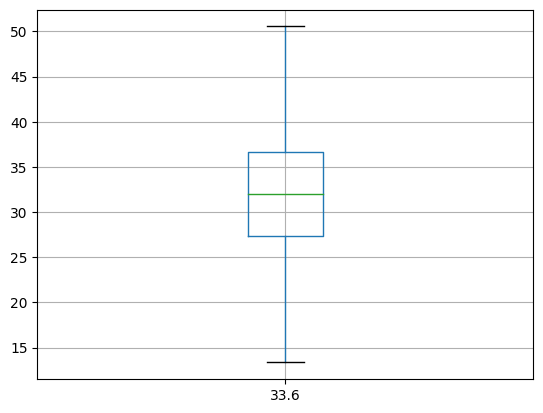

0.2435
0.371
0.625
0.3815
-0.32875000000000004
1.19725


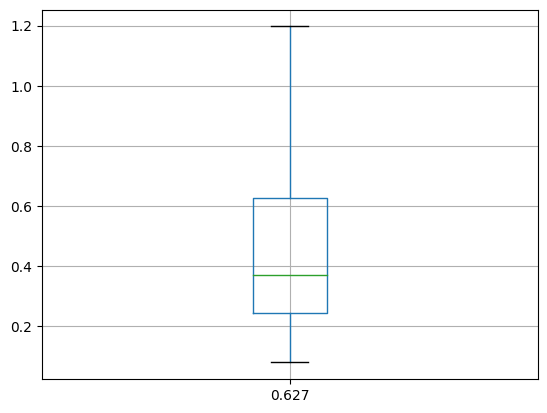

24.0
29.0
41.0
17.0
-1.5
66.5


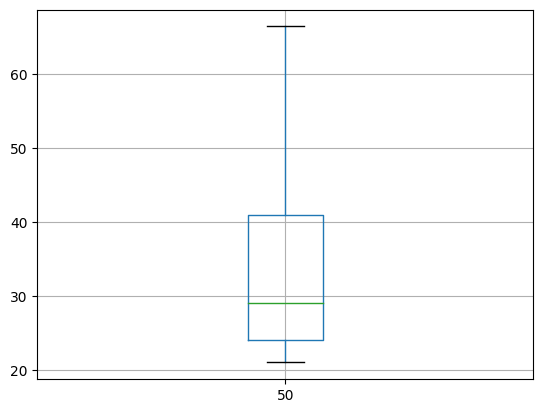

In [16]:
for col in outlierbox:
  Q1 = data[col].quantile(0.25)
  Q2 = data[col].quantile(0.50)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  print(Q1)
  print(Q2)
  print(Q3)
  print(IQR)
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  print(lower_bound)
  print(upper_bound)
  data[col]=data[col].clip(lower_bound,upper_bound)
  data.boxplot(col)
  plt.show()

<Axes: >

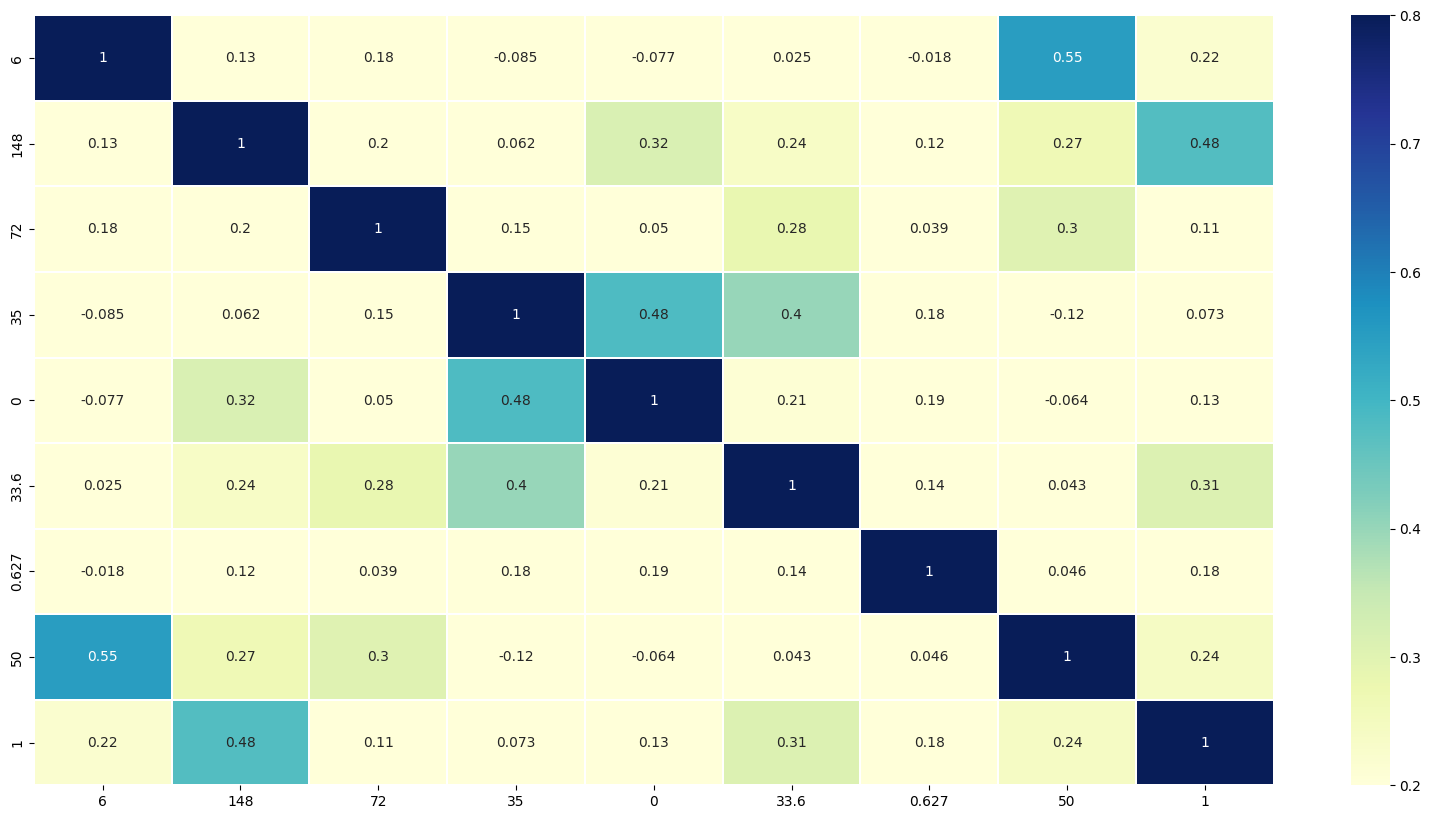

In [17]:
coormat = data.corr()
plt.subplots(figsize =(20,10))
sns.heatmap(coormat,annot=True,vmin=0.2,vmax=0.8,linewidths=0.2,cmap='YlGnBu')

In [19]:
x =  data.drop('1',axis=1)
y = data['1']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [23]:
y_pred=model.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)
print("confution matrix")
print(cm)

confution matrix
[[87 10]
 [19 38]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        97
           1       0.79      0.67      0.72        57

    accuracy                           0.81       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154



In [26]:
y_prob = model.predict_proba(x_test)
y_prob

array([[0.75677821, 0.24322179],
       [0.75116405, 0.24883595],
       [0.88646755, 0.11353245],
       [0.764663  , 0.235337  ],
       [0.93672656, 0.06327344],
       [0.87829351, 0.12170649],
       [0.888451  , 0.111549  ],
       [0.71991787, 0.28008213],
       [0.47346928, 0.52653072],
       [0.95753968, 0.04246032],
       [0.19522795, 0.80477205],
       [0.46351404, 0.53648596],
       [0.81013455, 0.18986545],
       [0.40961065, 0.59038935],
       [0.23871427, 0.76128573],
       [0.15627803, 0.84372197],
       [0.88528264, 0.11471736],
       [0.91618241, 0.08381759],
       [0.75846882, 0.24153118],
       [0.68366644, 0.31633356],
       [0.78685472, 0.21314528],
       [0.92858547, 0.07141453],
       [0.81242121, 0.18757879],
       [0.12531529, 0.87468471],
       [0.60118505, 0.39881495],
       [0.9551782 , 0.0448218 ],
       [0.8970924 , 0.1029076 ],
       [0.96985284, 0.03014716],
       [0.83308661, 0.16691339],
       [0.53195006, 0.46804994],
       [0.

In [27]:
from sklearn.metrics import roc_auc_score
y_prob = model.predict_proba(x_test)[:,1]
roc_acc=roc_auc_score(y_test,y_prob)
print("roc score",roc_acc)

roc score 0.8656176523783685


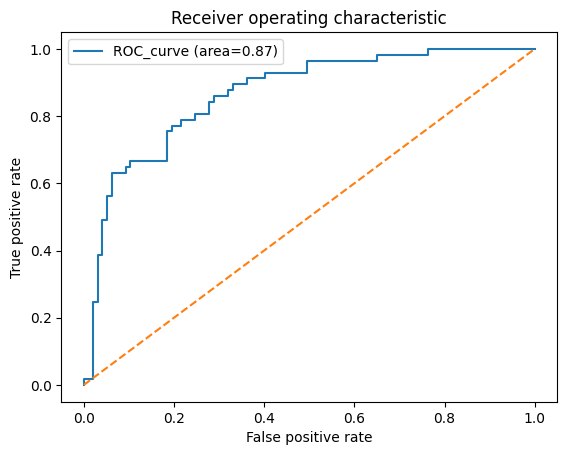

In [28]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,label = f'ROC_curve (area={roc_acc:.2f})')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend()
plt.show()